In [1]:
from pyopenms import *
Sequence = AASequence.fromString("DFPIANGER")
prefix = Sequence.getPrefix(5)
suffix = Sequence.getSuffix(4)
concatenate = prefix+suffix
print("Sequence>>", Sequence)
print("Prefix>>", prefix)
print("Suffix>>", suffix)
print("Concatenated>>",concatenate)


Sequence>> DFPIANGER
Prefix>> DFPIA
Suffix>> NGER
Concatenated>> DFPIANGER


In [4]:
MonoWeight = Sequence.getMonoWeight()
mprecursor = Sequence.getMonoWeight(Residue.ResidueType.Full, 2)

In [5]:
mz = Sequence.getMonoWeight(Residue.ResidueType.Full, 2) / 2.0
mz = Sequence.getMZ(2)
print("Monoisotopic mass of peptide [M] is", MonoWeight)
print("Monoisotopic mass of peptide precursor [M+2H]2+ is", mprecursor)
print("Monoisotopic m/z of [M+2H]2+ is", mz)

Monoisotopic mass of peptide [M] is 1017.4879641373001
Monoisotopic mass of peptide precursor [M+2H]2+ is 1019.5025170708419
Monoisotopic m/z of [M+2H]2+ is 509.75125853542096


In [6]:
Sequence = AASequence.fromString("DFPIANGER")
print("the peptide", str(Sequence), "consists of the following amino acids>>")
for seq in Sequence:
    print(seq.getName(), ":", seq.getMonoWeight())

the peptide DFPIANGER consists of the following amino acids>>
Aspartate : 133.0375092233
Phenylalanine : 165.0789793509
Proline : 115.06332928709999
Isoleucine : 131.0946294147
Alanine : 89.0476792233
Asparagine : 132.0534932552
Glycine : 75.0320291595
Glutamate : 147.0531592871
Arginine : 174.1116764466


In [7]:
Sequence = AASequence.fromString("DFPIANGER")
Sequence_formula = Sequence.getFormula()
print("Peptide", Sequence, "has molecular formula", Sequence_formula)

Peptide DFPIANGER has molecular formula C44H67N13O15


In [8]:
Isotopes = Sequence_formula.getIsotopeDistribution( CoarseIsotopePatternGenerator(6) )
for iso in Isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373001 has abundance 56.8165123462677 %
Isotope 1018.4913189751001 has abundance 30.52913248538971 %
Isotope 1019.4946738129 has abundance 9.802105277776718 %
Isotope 1020.4980286507001 has abundance 2.3292062804102898 %
Isotope 1021.5013834885001 has abundance 0.4492596257477999 %
Isotope 1022.5047383263001 has abundance 0.07378292502835393 %


In [9]:
fine_isotopes = Sequence_formula.getIsotopeDistribution( FineIsotopePatternGenerator(0.01) )
for iso in fine_isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373001 has abundance 56.80969953536987 %
Isotope 1018.4849991373001 has abundance 2.7278145775198936 %
Isotope 1018.4913191373001 has abundance 27.035287022590637 %
Isotope 1018.4921811373001 has abundance 0.3246041014790535 %
Isotope 1018.4942408854 has abundance 0.4377691075205803 %
Isotope 1019.4883541373001 has abundance 1.2981452979147434 %
Isotope 1019.4922181373001 has abundance 1.7511537298560143 %
Isotope 1019.4946741373 has abundance 6.286735832691193 %
Isotope 1019.4975958854001 has abundance 0.2083308296278119 %
Isotope 1020.4917091373001 has abundance 0.3018683288246393 %
Isotope 1020.4955731373002 has abundance 0.833360105752945 %
Isotope 1020.4980291373 has abundance 0.9519387967884541 %
Isotope 1021.4989281373 has abundance 0.1937880413606763 %


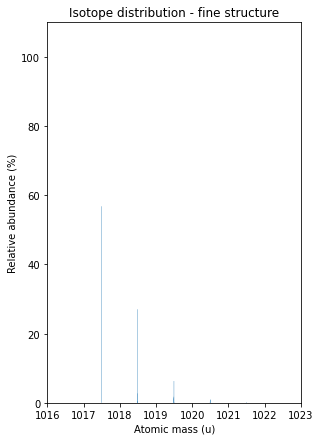

In [14]:
import math
from matplotlib import pyplot as plt

def plotIsotopeDistribution(isotope_distribution, title="Isotope distribution"):
    plt.title(title)
    distribution = {"mass": [], "abundance": []}
    for iso in isotope_distribution.getContainer():
        distribution["mass"].append(iso.getMZ())
        distribution["abundance"].append(iso.getIntensity() * 100)

    bars = plt.bar(distribution["mass"], distribution["abundance"], width=0.01, snap=False) # snap ensures that all bars are rendered

    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))
    plt.xlabel("Atomic mass (u)")
    plt.ylabel("Relative abundance (%)")

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)

plotIsotopeDistribution(fine_isotopes, "Isotope distribution - fine structure")
plt.show()


In [16]:
suffix = Sequence.getSuffix(3)
print("Y3 ion sequence:", suffix)
Y3_formula = suffix.getFormula(Residue.ResidueType.YIon, 2)
suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0
suffix.getMonoWeight(Residue.ResidueType.XIon, 2) / 2.0
suffix.getMonoWeight(Residue.ResidueType.BIon, 2) / 2.0

print("Y3 m/z:", suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 )
print("Y3 molecular formula:", Y3_formula)

Y3 ion sequence: GER
Y3 m/z: 181.09514384957103
Y3 molecular formula: C13H24N6O6


In [17]:
bsa=FASTAEntry()
bsa.sequence= "MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE"
bsa.description = "BSA Bovine Albumin (partial sequence)"
bsa.identifier = "BSA"

alb = FASTAEntry()
alb.sequence = "MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE"
alb.description = "ALB Human Albumin (partial sequence)"
alb.identifier = "ALB"

entries=[bsa,alb]
file=FASTAFile()
file.store("example.fasta",entries)

In [18]:
entrie=[]
file=FASTAFile()
file.load("example.fasta",entrie)
for seq in entrie:
    print(seq.sequence,seq.identifier)

MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE BSA
MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE ALB
